In [1]:
import numpy
import os
import pickle
from matplotlib import pyplot as plt
import numpy as np

In [2]:
cvae_fn = '/mmfs1/data/aglinska/tf_outputs/CVAE/Feb23_1551_D16B1G100_DTrue'
vae_fn = '/mmfs1/data/aglinska/tf_outputs/VAE/APR_4th_D32DTrue_G100'

In [3]:
cvae_loss = pickle.load(open(cvae_fn+'_loss.pickle','rb'))
vae_loss = pickle.load(open(vae_fn+'_loss.pickle','rb'))

In [4]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [5]:
len(cvae_loss)

1971

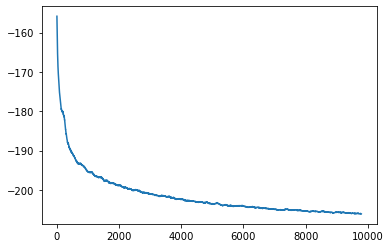

In [6]:
plt.plot(moving_average(vae_loss[10::],100))

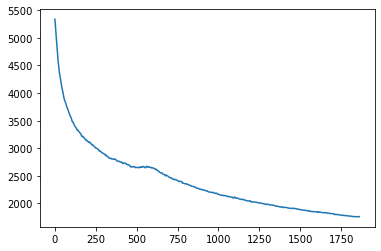

In [7]:
plt.plot(moving_average(cvae_loss[10::],100))

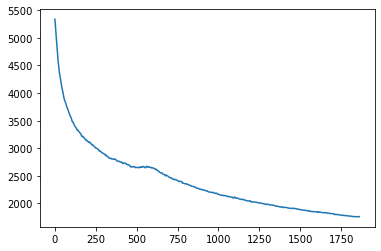

In [8]:
plt.plot(moving_average(cvae_loss[10::],100))

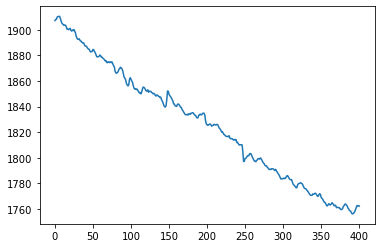

In [9]:
plt.plot(moving_average(cvae_loss[-500::],100))

In [10]:
len(cvae_loss[2::])

1969

In [35]:
len(cvae_loss)

1971

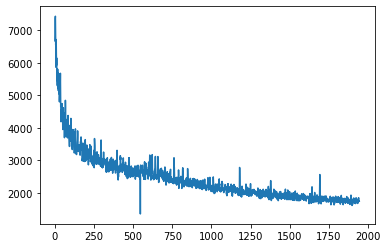

In [38]:
plt.plot(cvae_loss[25::])

0.39053466796875


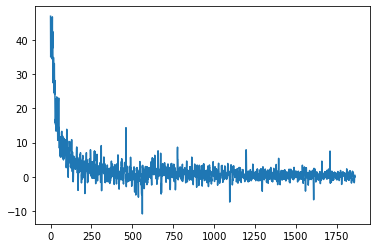

In [43]:
vec=moving_average(np.array(cvae_loss)[0:-1]-np.array(cvae_loss)[1::],100)
plt.plot(vec[10::])
print(vec[-1])

0.014579010009765626


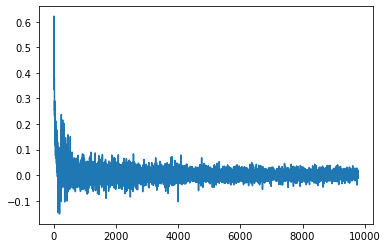

In [44]:
vec=moving_average(np.array(vae_loss)[0:-1]-np.array(vae_loss)[1::],100)
plt.plot(vec[10::])
print(vec[-1])

In [ ]:
# vec1=moving_average(cvae_loss,50)[1::]
# vec2=moving_average(cvae_loss,50)[0:-1]
# plt.plot((vec2-vec1)[25::])

In [ ]:
vec1=moving_average(cvae_loss,50)[1::]
vec2=moving_average(cvae_loss,50)[0:-1]
plt.plot((vec2-vec1)[25::])

In [ ]:
vec1=moving_average(vae_loss,50)[1::]
vec2=moving_average(vae_loss,50)[0:-1]
plt.plot((vec2-vec1)[25::])